# Data understanding 


First of all we import the libraries

In [1]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [44]:
df=pd.read_csv("dataset-progetto/train.csv", skipinitialspace=True)

-	What kind of attributes do we have?
-	How is the data quality?
-	Does a visualization help?
-	Are attributes correlated?
-	What about outliers?
-	How are missing values handled?
-	Do we need to extract other attributes?

## What kind of attributes do we have?

In [3]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


In [4]:
df.shape

(15000, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [7]:
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000
mean,2.468075e+05,27.423667,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647
std,1.279941e+05,18.587534,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616
min,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116
25%,1.800000e+05,14.000000,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953
50%,2.278260e+05,24.000000,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916
75%,2.889030e+05,42.000000,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057
max,4.120258e+06,94.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,4.120258e+06,5.000000,7348.000000,2170.00000,1.000000,4.067086


## How is the data quality?

We notice that all the attributes that indicate the "genre" of the songs have the same frequency (quante volte è ripetuto quel genere)

In [37]:
genre_counts = df['genre'].value_counts()
print(genre_counts)

j-dance          750
iranian          750
brazil           750
chicago-house    750
forro            750
idm              750
indian           750
study            750
disney           750
afrobeat         750
mandopop         750
techno           750
sleep            750
spanish          750
j-idol           750
industrial       750
happy            750
bluegrass        750
black-metal      750
breakbeat        750
Name: genre, dtype: int64


Gli artisti più frequenti

In [40]:
artists_counts = df['artists'].value_counts()
print(artists_counts.head(10))

Vybz Kartel                    80
Germaine Franco                75
Scooter                        74
Sarah, the Illstrumentalist    69
Jay Chou                       67
The Prophet                    64
Alphaxone                      56
Shiritsu Ebisu Chugaku         53
Nogizaka46                     53
Rammstein                      53
Name: artists, dtype: int64


I creat a new attribute called "num_artists" that counts how many artists made a track and I see the distribution of the number of artists in any song

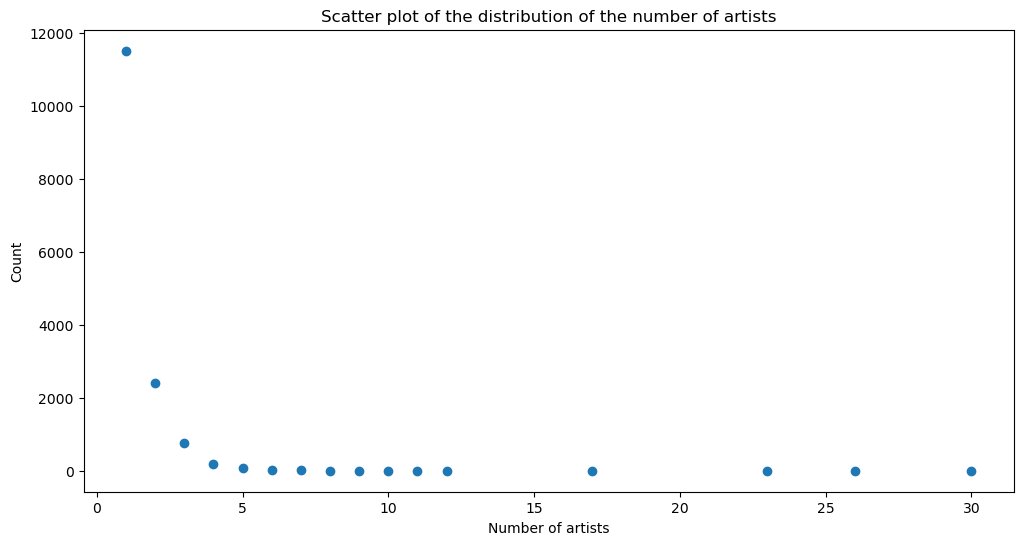

In [62]:
df['num_artists'] = df['artists'].str.split(';').apply(len)
artist_counts = df['num_artists'].value_counts().sort_index()

plt.figure(figsize=(12, 6))


plt.scatter(artist_counts.index,  artist_counts.values)  # Plotting sepal width against petal length.
plt.ylabel('Count')
plt.xlabel('Number of artists')
plt.title('Scatter plot of the distribution of the number of artists')
plt.show()

These attributes have some missing values:

- mode: 4450
- time_signature: 2062
- popularity_confidence: 12783

### Gestione missing values

- Siccome popularity_confidence ha troppi valori mancanti ed è simile all'attributo popularity, nella fase di data preparation potremmo aggregarli per ridurre la dimensione del dataframe
- Intendendo mode(vedi definizione) come accordi minori o maggiori e ipotizzando che minori sono canzoni tristi mentre maggiori felici.
Si può immaginare che magari un genere sia più triste o felice di un altro(x esempio genre:'happy' avrà probabilmente molti mode maggiori).
Quindi x i missing value di mode possiamo fare riferimento ai valori di genre (usando magari una moda )

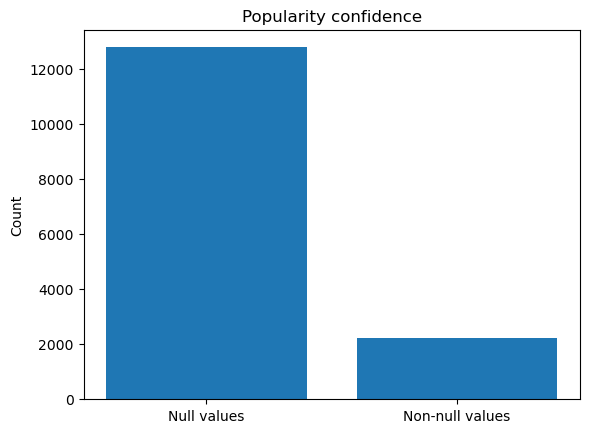

In [9]:
missing_values_pop_conf=df['popularity_confidence'].isnull().sum()
data=df['popularity_confidence'].shape[0]
non_null=data-missing_values_pop_conf
objects = ("Null values", "Non-null values")

y_pos = np.arange(len(objects))
performance = [missing_values_pop_conf,non_null]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Popularity confidence')

plt.show()

In [10]:
print(df.isnull().any(), "\n------------------------------------------------\n" ,df.isnull().sum())

name                     False
duration_ms              False
explicit                 False
popularity               False
artists                  False
album_name               False
danceability             False
energy                   False
key                      False
loudness                 False
mode                      True
speechiness              False
acousticness             False
instrumentalness         False
liveness                 False
valence                  False
tempo                    False
features_duration_ms     False
time_signature            True
n_beats                  False
n_bars                   False
popularity_confidence     True
processing               False
genre                    False
dtype: bool 
------------------------------------------------
 name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceab

nell'attributo mode anche se è un float64 abbiamo solo valori 0.0 o 1.0 o NaN, quindi probabilmente potremmo fare la binarization e trasformarlo in un attributo binario. 

In [22]:
mode=list(df["mode"])
print(mode[0:20])

modi=df["mode"].unique
print("----------",modi)

[1.0, 0.0, nan, 1.0, 1.0, nan, 1.0, nan, nan, 1.0, 1.0, 0.0, 1.0, nan, nan, nan, 0.0, nan, nan, 0.0]
---------- <bound method Series.unique of 0        1.0
1        0.0
2        NaN
3        1.0
4        1.0
        ... 
14995    NaN
14996    1.0
14997    NaN
14998    1.0
14999    1.0
Name: mode, Length: 15000, dtype: float64>


## Cose che abbiamo osservato: 

- Nell'attributo mode anche se è un float64 abbiamo solo valori 0.0 o 1.0 o NaN, quindi probabilmente potremmo fare la binarization e trasformarlo in un attributo binario. Guardare parte di binarizzazione dell'attributo sex nel dataset del titanic
- We notice that all the attributes that indicate the "genre" of the songs have the same frequency (quante volte è ripetuto quel genere)
- Siccome popularity_confidence ha troppi valori mancanti ed è simile all'attributo popularity, nella fase di data preparation potremmo aggregarli per ridurre la dimensione del dataframe
- Intendendo mode(vedi definizione) come accordi minori o maggiori e ipotizzando che minori sono canzoni tristi mentre maggiori felici.
Si può immaginare che magari un genere sia più triste o felice di un altro(x esempio genre:'happy' avrà probabilmente molti mode maggiori).
Quindi x i missing value di mode possiamo fare riferimento ai valori di genre (usando magari una moda )

0    46
1     0
2     3
3    23
4    25
Name: popularity, dtype: int64


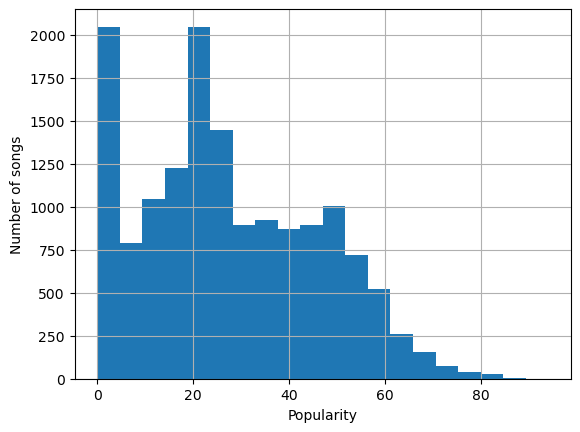

In [12]:
print(df["popularity"].head(5))
df['popularity'].hist(bins=20)
plt.xlabel("Popularity")
plt.ylabel("Number of songs")
plt.show()

- Modificare duration_ms in duration da millisecondi a minuti

In [13]:
df_copy = df.copy()
df_copy["duration_m"] = df_copy["duration_ms"] / (60 * 1000)  # Converti da millisecondi a minuti
del df_copy['duration_ms']
df_copy.head()


,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,...,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,duration_m
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,...,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance,4.029333
1,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,...,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian,7.400000
2,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,...,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal,5.558433
3,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,...,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass,4.496667
4,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,...,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy,5.127517


In [14]:
df_copy = df.copy()
df_copy["duration_m"] = df_copy["duration_ms"] / (60 * 1000)  # Converti da millisecondi a minuti
df_copy["duration_m"] = (df_copy["duration_m"] * 2).round() / 2
del df_copy['duration_ms']
df_copy.head()


,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,...,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,duration_m
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,...,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance,4.0
1,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,...,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian,7.5
2,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,...,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal,5.5
3,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,...,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass,4.5
4,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,...,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy,5.0


In [20]:
df_copy.corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,duration_m
explicit,1.000000,-0.013096,0.056992,0.124405,-0.000991,0.131777,-0.042846,0.294287,-0.113975,-0.125101,0.006995,0.008631,0.016972,-0.048699,0.051260,-0.039830,-0.039435,0.029119,-0.005878,-0.048682
popularity,-0.013096,1.000000,0.051046,-0.056547,-0.008992,0.046703,0.073043,-0.096382,0.078424,-0.266843,0.027105,0.077652,-0.024162,-0.076228,-0.003160,-0.084774,-0.089134,-0.003665,0.008733,-0.076213
danceability,0.056992,0.051046,1.000000,0.193940,0.035311,0.385244,-0.072422,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,-0.080891,0.292167,-0.033604,-0.069332,0.011602,-0.026273,-0.081181
energy,0.124405,-0.056547,0.193940,1.000000,0.057815,0.720907,-0.079969,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.102985,0.204646,0.243586,0.208615,0.040022,-0.037847,0.102335
key,-0.000991,-0.008992,0.035311,0.057815,1.000000,0.047718,-0.157515,0.018157,-0.049867,-0.001532,-0.007420,0.028221,0.022414,0.016786,0.028388,0.027133,0.022042,0.019790,-0.490366,0.016747
loudness,0.131777,0.046703,0.385244,0.720907,0.047718,1.000000,-0.033544,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.039415,0.250568,0.165565,0.131064,0.049174,-0.020563,0.038861
mode,-0.042846,0.073043,-0.072422,-0.079969,-0.157515,-0.033544,1.000000,-0.064289,0.085246,-0.080035,0.015738,-0.006907,-0.013001,-0.023409,-0.019378,-0.030685,-0.027687,0.003698,0.261129,-0.022632
speechiness,0.294287,-0.096382,0.111454,0.143454,0.018157,0.109793,-0.064289,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,-0.074722,0.080739,-0.043217,-0.040820,0.026399,-0.022909,-0.074661
acousticness,-0.113975,0.078424,-0.199082,-0.699454,-0.049867,-0.552519,0.085246,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.184846,-0.139706,-0.283324,-0.248164,-0.021155,0.022684,-0.184197
instrumentalness,-0.125101,-0.266843,-0.202316,-0.203111,-0.001532,-0.447106,-0.080035,-0.115803,0.094256,1.000000,-0.088589,-0.348955,-0.117466,0.079757,-0.123982,0.034830,0.044498,-0.025716,-0.012960,0.079719


In [28]:
embarked_locs = sorted(df['mode'].unique())
embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs) + 1)))
print(embarked_locs_mapping)

df_copy['mode'] = df['mode'].map(embarked_locs_mapping).astype(int)
df_copy.head()

{0.0: 0, 1.0: 1, nan: 2}


,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,...,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,duration_m
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1,...,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance,4.0
1,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0,...,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian,7.5
2,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,2,...,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal,5.5
3,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1,...,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass,4.5
4,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1,...,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy,5.0


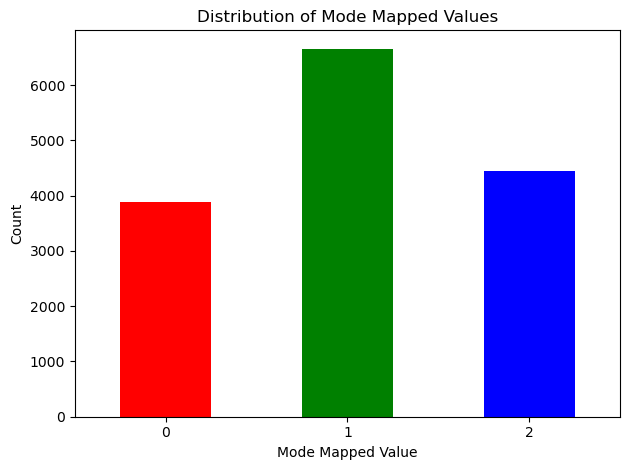

In [32]:
df_copy['mode'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])

# Imposta le etichette e il titolo
plt.xlabel('Mode Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of Mode Mapped Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()